# Steepest descent on the elliptical, interacting case

We use steepest descent to find the minimum value of $\alpha$ for the interacting wavefunction with the elliptical potential.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tqdm

from vmc.interface import *

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1
omega = 1

beta = _lambda = np.sqrt(8)
radius = 0.0043

num_particles = 10
num_dimensions = 3

alpha_min = 0.2
alpha_max = 0.7
num_alphas = 6
alphas = (np.random.random(num_alphas)*(alpha_max - alpha_min) + alpha_min).reshape(num_alphas, 1)

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

num_samples = int(2**18)
num_thermalization_steps = int(0.1*num_samples)

step_length = 0.1

sample_args = [num_samples, step_length]
sample_kwargs = {
    "num_thermalization_steps": num_thermalization_steps
}

max_iterations = 50
tol = 1e-9
gamma = 0.01
gamma_scale = 0.999

In [4]:
sampler = PySampler(
    PyInteractingEllipticalGaussian(
        num_particles, num_dimensions, mass, omega, beta, radius,
        spread=np.sqrt(step_length)
    ), PyEllipticalHarmonicOscillator(_lambda),
    PyImportanceMetropolis()
)

In [5]:
alpha_trail = []
for alpha in alphas:
    alpha_trail.append(sampler.find_minimum(
        alpha, gamma, gamma_scale, max_iterations,
        *sample_args, tol=tol, **sample_kwargs))


Iteration: 0
Gradient: [-132.31009718]
Old parameters: [0.2]
Current parameters: [0.30462019]

Iteration: 1
Gradient: [-40.91545415]
Old parameters: [0.30462019]
Current parameters: [0.71377474]

Iteration: 2
Gradient: [12.74433446]
Old parameters: [0.71377474]
Current parameters: [0.58633139]

Iteration: 3
Gradient: [6.7993418]
Old parameters: [0.58633139]
Current parameters: [0.51833797]

Iteration: 4
Gradient: [1.97928293]
Old parameters: [0.51833797]
Current parameters: [0.49854514]

Iteration: 5
Gradient: [0.10772348]
Old parameters: [0.49854514]
Current parameters: [0.49746791]

Iteration: 6
Gradient: [0.00084444]
Old parameters: [0.49746791]
Current parameters: [0.49745946]

Iteration: 0
Gradient: [-41.15723537]
Old parameters: [0.3]
Current parameters: [0.71157235]

Iteration: 1
Gradient: [12.56793891]
Old parameters: [0.71157235]
Current parameters: [0.58589296]

Iteration: 2
Gradient: [6.80206191]
Old parameters: [0.58589296]
Current parameters: [0.51787235]

Iteration: 3
Gr

In [6]:
print (alpha_trail)

[array([[0.2       ],
       [0.30462019],
       [0.71377474],
       [0.58633139],
       [0.51833797],
       [0.49854514],
       [0.49746791],
       [0.49745946]]), array([[0.3       ],
       [0.71157235],
       [0.58589296],
       [0.51787235],
       [0.49904895],
       [0.49747861],
       [0.4974273 ],
       [0.49748474],
       [0.49746166]]), array([[0.4       ],
       [0.53188036],
       [0.50182331],
       [0.49761093],
       [0.4974596 ],
       [0.4974418 ]]), array([[0.5       ],
       [0.4974    ],
       [0.49739206]]), array([[0.6       ],
       [0.52315958],
       [0.5000096 ],
       [0.49746465],
       [0.49744742]]), array([[0.7       ],
       [0.57823218],
       [0.51400675],
       [0.49897485],
       [0.49746027],
       [0.49740039],
       [0.49744451],
       [0.49744634]])]


In [7]:
final_alphas = list(map(lambda x: x[-1], alpha_trail))

print ("alpha_0 = {0:.5f} +/- {1:.5f}".format(np.mean(final_alphas), np.std(final_alphas)))

alpha_0 = 0.49744 +/- 0.00002


It is interesting to note that a low initial $\alpha$ yields a very large, negative gradient. This means that if $\gamma$ is too large we can completely miss the minimum $\alpha$ and go into an unstable region of parameter space. This is possible to observe by looking at the energy curve when $\alpha$ gets close to zero. Perhaps an adaptive $\gamma$ could be used where a low $\alpha$ should have a smaller $\gamma$ than the other choices of initial $\alpha$. A too low $\gamma$ will take ages to reach its destination. This also means that it at times should increase if convergence takes too long.

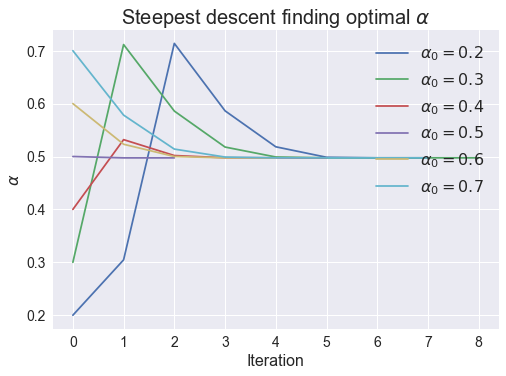

In [8]:
for trail in alpha_trail:
    plt.plot(trail, label=r"$\alpha_0 = %g$" % trail[0])

plt.xlabel("Iteration", fontsize=16)
plt.ylabel(r"$\alpha$", fontsize=16)
plt.title(
    r"Steepest descent finding optimal $\alpha$",
    fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="best", fontsize=16)
plt.savefig("../data/figures/problem_f.pdf")
plt.show()